In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [4]:
# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split.values.ravel())

RandomForestRegressor(random_state=42)

In [6]:
# Predict on the validation set
y_pred = model.predict(X_val)

In [7]:
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [8]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.02000215246592601
R-squared (R²): 0.892815093709581


In [9]:
# Get feature importances
importances = model.feature_importances_
features = X_train.columns

In [10]:
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

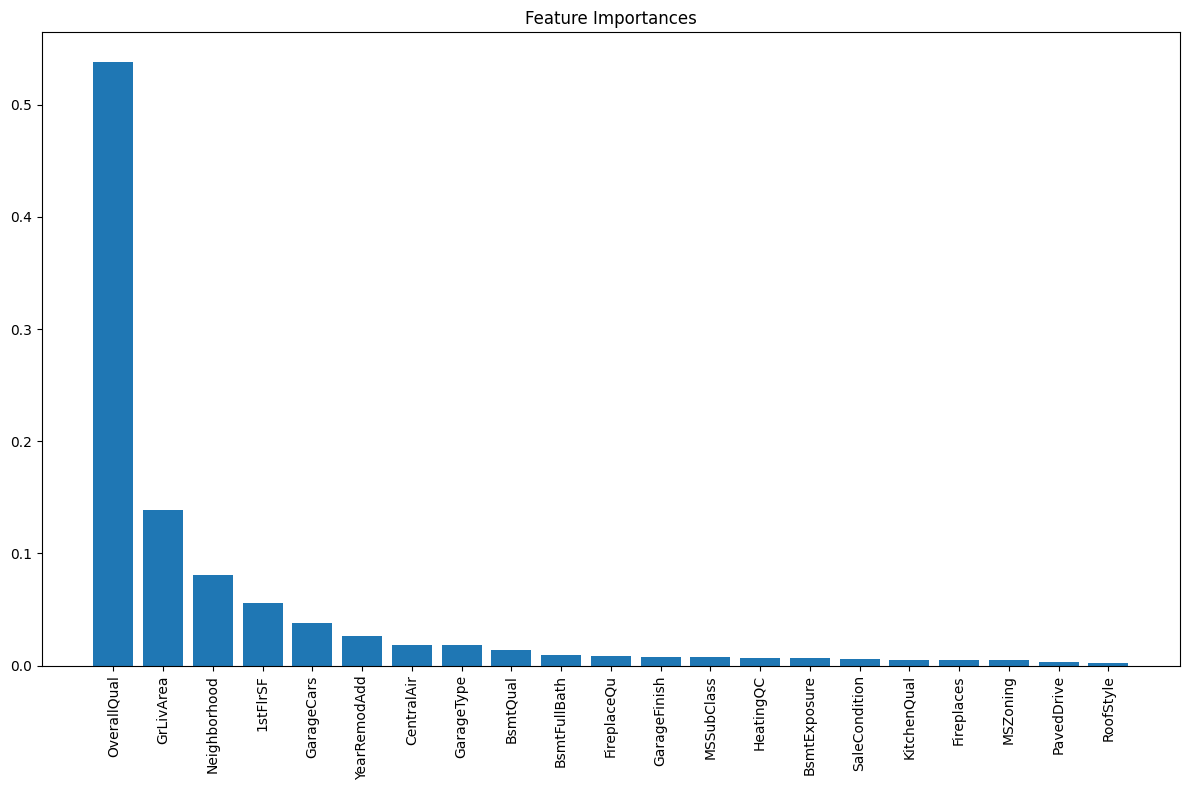

In [11]:

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()